<a href="https://colab.research.google.com/github/solobt777/Python_solobt777/blob/main/Week-3-Machine-Learning-Assignments/Boosting%20Exercise/GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Grandient Boosting Model

In [ ]:
!pip install seaborn

In [ ]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# pd.Series(data.target) creates a pandas Series object from the 'target' values in the diabetes dataset.
# A pandas Series is a one-dimensional labeled array, useful for storing and manipulating a single column of data.
# In this case, 'data.target' contains the target variable (disease progression) for each sample.

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.duplicated()
df[df.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


In [ ]:
y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=1.0, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mae

63.026492402199445

#### This code extracts the feature importance scores from the trained Gradient Boosting Regressor model (`gbr`). It creates a pandas Series (`feature_score`) that maps each feature name to its corresponding importance score, then sorts the features in descending order of importance. The resulting `feature_score` Series helps identify which features have the greatest impact on the model's predictions.

In [ ]:
feature_importances = gbr.feature_importances_
feature_score = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
feature_score

bmi    0.438203
s5     0.140665
bp     0.081865
s6     0.080073
s1     0.065211
s2     0.059770
s4     0.044307
age    0.041748
s3     0.041399
sex    0.006759
dtype: float64

#### This code visualizes the importance of each feature in the dataset as determined by the trained Gradient Boosting Regressor model. It uses Seaborn's barplot to display the feature importance scores, with features listed on the y-axis and their corresponding importance scores on the x-axis. The plot helps to quickly identify which features contribute most to the model's predictions.



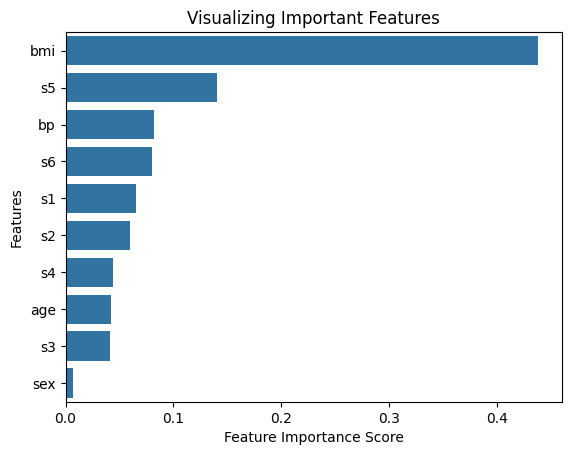

In [ ]:

sns.barplot(x=feature_score, y=feature_score.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()